# Frollo Data Science Work Sample

In [71]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt


In [17]:
FILE_NAME = 'SampleData_Frollo_DSRecruitment_Public.csv'

df = pd.read_csv(FILE_NAME)

## 1. Inspect Data

In [18]:
df.sample(10)

,transaction_description,transaction_amount,transaction_account_type,transaction_class,description_cleaned,transaction_type
12,INTERNET TRANSFER Extras OW J,149.05,savings,transfer,internet transfer extra,debit
93,ATM W/D NP-Caltex Ura-10:48,-70.00,transaction,cash-withdrawal,atm withdrawal caltex ura TIMETOKEN,credit
285,BUNNINGS 418000 WAURN PONDS AUS,-279.09,credit-card,payment,bunnings NUMBERTOKEN waurn pond,credit
14,Transfer from xx9156 NetBank thurs 13 dec,767.03,transaction,transfer,transfer netbank thurs dec,debit
380,POS W/D WOOLWORTHS 11-15:56,-22.80,transaction,payment,withdrawal woolworth TIMETOKEN,credit
75,ANZ M-BANKING FUNDS TFER TRANSFER 364389 TO ...,-307.00,transaction,transfer,anz banking fund transfer transfer NUMBERTOKEN...,credit
405,WITHDRAWAL ONLINE 1527463 PYMT Matthew Gi WSB Kym,-20.00,transaction,cash-withdrawal,withdrawal online NUMBERTOKEN payment matthew ...,credit
22,Direct Debit 342120 Raiz Investment 6a5639c8b7...,-30.00,transaction,transfer,direct debit NUMBERTOKEN raiz investment 6a563...,credit
269,Everyday round up - Everyday round up - Receip...,-0.50,transaction,transfer,everyday round everyday round RECEIPTTOKEN car...,credit
132,adobe il creative cld visa refund receipt 5777...,0.15,transaction,refund,adobe creative cld visa refund RECEIPTTOKEN ad...,debit


In [23]:
print(f'Number of data samples: {df.shape[0]}')
print(f'Number of data features: {df.shape[1]}')

Number of data samples: 410
Number of data features: 6


In [28]:
print('Check for missing values.\n')
print(df.isnull().sum())

Check for missing values

transaction_description     0
transaction_amount          0
transaction_account_type    0
transaction_class           0
description_cleaned         0
transaction_type            0
dtype: int64


In [38]:
print('Check data types.\n')
print(df.dtypes)

Check data types.

transaction_description      object
transaction_amount          float64
transaction_account_type     object
transaction_class            object
description_cleaned          object
transaction_type             object
dtype: object


In [42]:
print('Check class categories.\n')
print(df.nunique())

Check class categories.

transaction_description     408
transaction_amount          266
transaction_account_type      6
transaction_class             6
description_cleaned         337
transaction_type              2
dtype: int64


### 1.1 Summary

From the preceeding inspection, we can conclude the following:
- There are no missing values
- The columns are correctly formatted

We can procede with our analysis without any cleaning needed.

## 2. Data Profile

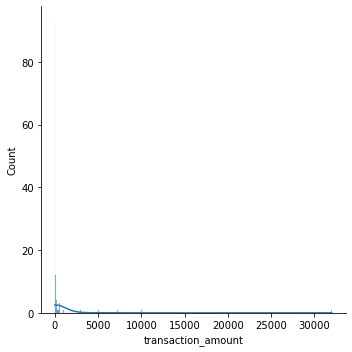

In [75]:
fig = sns.displot(df.transaction_amount, bins=50, kde=True, alpha=0.5)

In [72]:
charts = {}
for i in ['transaction_account_type', 'transaction_class']:
    feature_count = df[i].value_counts(dropna=False)[:40].reset_index().rename(columns={i: 'count', 'index': i})
    chart = alt.Chart(feature_count).mark_bar().encode(
                x=alt.X(f"{i}:N", axis=alt.Axis(title=i)),
                y=alt.Y('count:Q', axis=alt.Axis(title='Count')),
                tooltip=[i, 'count']
            ).properties(title=f"Counts of {i}", width=800)
    charts[i] = chart